# Importing local .py file in notebook

In [1]:
!python3 dashboard/__init__.py
%load_ext autoreload
%autoreload 2

Traceback (most recent call last):
  File "dashboard/__init__.py", line 1, in <module>
    from dashboard.modeling import ClassificationModel
ModuleNotFoundError: No module named 'dashboard'


# Importing the module

In [2]:
import yaml
import pandas as pd
import numpy as np 
import seaborn as sns

In [3]:
from dashboard import DataInformation

# Reading config.yaml file 

In [4]:
with open("config.yaml", "r") as stream:
    cl = yaml.safe_load(stream)

In [5]:
train = cl['train']
feature = cl['feature']
test = cl['test']
test21 = cl['test21']

In [6]:
train

'./raw_data/KDDTrain+.txt'

# Reading Dataset using pandas 

Have you ever wondered how your computer/network is able to avoid being infected with malware and bad traffic inputs from the internet? The reason why it can detect it so well is because there are systems in place to protect your valuable information held in your computer or networks. These systems that detect malicious traffic inputs are called Intrusion Detection Systems (IDS) and are trained on internet traffic record data. The most common data set is the NSL-KDD, and is the benchmark for modern-day internet traffic.

This data set is comprised of four sub data sets: KDDTest+, KDDTest-21, KDDTrain+, KDDTrain+_20Percent, although KDDTest-21 and KDDTrain+_20Percent are subsets of the KDDTrain+ and KDDTest+. From now on, KDDTrain+ will be referred to as train and KDDTest+ will be referred to as test. The KDDTest-21 is a subset of test, without the most difficult traffic records (Score of 21), and the KDDTrain+_20Percent is a subset of train, whose record count makes up 20% of the entire train dataset. That being said, the traffic records that exist in the KDDTest-21 and KDDTrain+_20Percent are already in test and train respectively and aren’t new records held out of either dataset.

These data sets contain the records of the internet traffic seen by a simple intrusion detection network and are the ghosts of the traffic encountered by a real IDS and just the traces of its existence remains. The data set contains 43 features per record, with 41 of the features referring to the traffic input itself and the last two are labels (whether it is a normal or attack) and Score (the severity of the traffic input itself).

In [7]:
train_data=pd.read_csv(train,names=feature)
test_data=pd.read_csv(test,names=feature)
test_21 = pd.read_csv(test21, names= feature)

In [8]:
test_data=pd.read_csv(test,names=feature)

In [9]:
train_info = DataInformation(train_data) ## Creating the object of datainformation class

In [10]:
train_info.get_dataset_head() ## looks of first 12 rows of data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
5,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
6,0,tcp,private,S0,0,0,0,0,0,0,...,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
7,0,tcp,private,S0,0,0,0,0,0,0,...,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
8,0,tcp,remote_job,S0,0,0,0,0,0,0,...,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
9,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21


In [11]:
train_info.get_info() ## information of all column in dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [12]:
train_info.check_data_imbalance() ## count of each label of dataset

normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: label, dtype: int64

In [13]:
## Drop the difficulty  colum 

In [14]:
train_data = train_info.drop_column("difficulty")

In [15]:
#Data Analysis 

In [16]:
from dashboard import Visualization

In [17]:
train_viz = Visualization

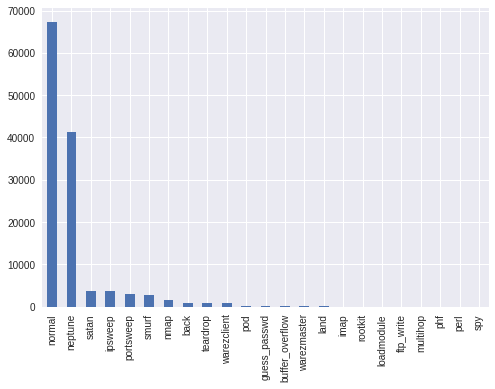

In [18]:
train_viz.bar_graph(train_data, "label")

Within the data set exists 4 different classes of attacks:

Denial of Service (DoS)
Probe
User to Root(U2R)
Remote to Local (R2L)

DoS is an attack that tries to shut down traffic flow to and from the target system. The IDS is flooded with an abnormal amount of traffic, which the system can’t handle, and shuts down to protect itself. This prevents normal traffic from visiting a network. An example of this could be an online retailer getting flooded with online orders on a day with a big sale, and because the network can’t handle all the requests, it will shut down preventing paying customers to purchase anything. This is the most common attack in the data set.

Probe or surveillance is an attack that tries to get information from a network. The goal here is to act like a thief and steal important information, whether it be personal information about clients or banking information.

U2R is an attack that starts off with a normal user account and tries to gain access to the system or network, as a super-user (root). The attacker attempts to exploit the vulnerabilities in a system to gain root privileges/access.



R2L is an attack that tries to gain local access to a remote machine. An attacker does not have local access to the system/network, and tries to “hack” their way into the network.

It is noticed from the descriptions above that DoS acts differently from the other three attacks, where DoS attempts to shut down a system to stop traffic flow altogether, whereas the other three attempts to quietly infiltrate the system undetected.

In the table below, a breakdown of the different subclasses of each attack that exists in the data set is shown

![simpleimage](raw_data/detail.png)

In [19]:
from dashboard import change_label

In [20]:
final_label_list = ['Dos','R2L','Probe','U2R']

In [21]:
for label in final_label_list:
    change_label(train_data, cl[label], label)

In [22]:
train_info.check_data_imbalance() ## count of each label of dataset

normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: label, dtype: int64

In [23]:
train_data['label'].unique()

array(['normal', 'Dos', 'R2L', 'Probe', 'U2R'], dtype=object)

Now there are 4 unique type of attract in label column. 

In [24]:
train_info_lc = DataInformation(train_data)

In [25]:
train_info_lc.check_data_imbalance()

normal    67343
Dos       45927
Probe     11656
R2L         995
U2R          52
Name: label, dtype: int64

Data is highly imbalance so accuracy doesnot works to check the metric. we need to explore other materics.

# \> Check How many categorical values are present in the dataset

In [26]:
train_info_lc.get_categorical_data_columns()

Index(['protocol_type', 'service', 'flag', 'label'], dtype='object')

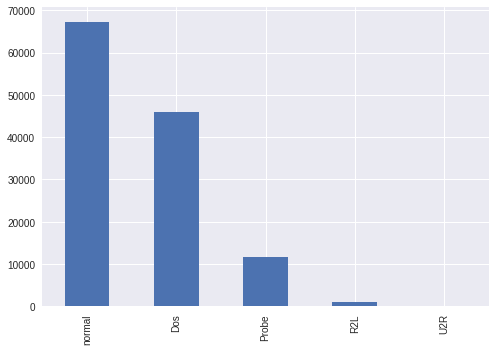

In [27]:
train_viz.bar_graph(train_data, "label")

# Protocol
Attribute No. : 2

Attribute Name. : Protocol_type

Description : Protocol used in the connection


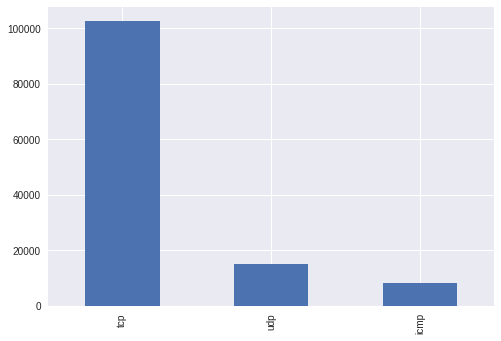

In [28]:
train_viz.bar_graph(train_data,'protocol_type')

In [29]:
train_data.protocol_type.value_counts()

tcp     102689
udp      14993
icmp      8291
Name: protocol_type, dtype: int64

# Flag

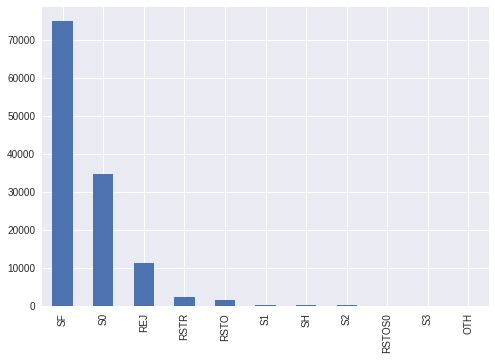

In [30]:
train_viz.bar_graph(train_data,'flag')


# Services
Attribute No. : 3

Attribute Name. : Service

Description : Destination network service used

In [31]:
services_frequency = train_data['service'].value_counts()


# Duration
Attribute No. : 1

Attribute Name. : Duration

Description : Length of time duration of the connection
    Duration is the contineous value so we need to make is discreate so that the error while trainnig will me minimized 
    

/home/bhupin/akash_vai/venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


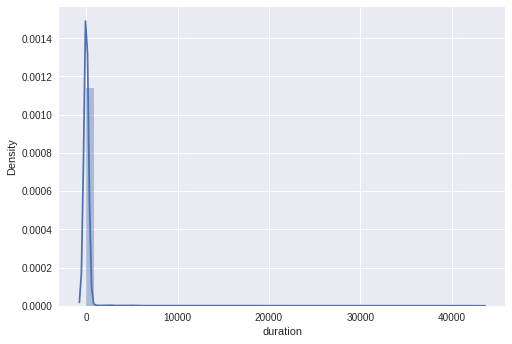

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
df = train_data['duration']
df = pd.DataFrame(df)
data_feature = df.columns

for feature in data_feature:
    p = sns.distplot(a = df[feature])
    plt.show()

In [33]:
train_data['duration']

0         0
1         0
2         0
3         0
4         0
         ..
125968    0
125969    8
125970    0
125971    0
125972    0
Name: duration, Length: 125973, dtype: int64

In [34]:
df['binned']=pd.cut(df['duration'], bins=[-0.1, 0 , 10000, 20000, 30000, 40000])
df.head()

,duration,binned
0,0,"(-0.1, 0.0]"
1,0,"(-0.1, 0.0]"
2,0,"(-0.1, 0.0]"
3,0,"(-0.1, 0.0]"
4,0,"(-0.1, 0.0]"


In [35]:
df['duration_bin']=pd.cut(df['duration'], bins=[-0.1, 0 , 10000, 20000, 30000, 40000], labels=["0", " (0, 10000]", "(10000, 20000]","(20000, 30000]", "(30000, 40000]"])
df

,duration,binned,duration_bin
0,0,"(-0.1, 0.0]",0
1,0,"(-0.1, 0.0]",0
2,0,"(-0.1, 0.0]",0
3,0,"(-0.1, 0.0]",0
4,0,"(-0.1, 0.0]",0
...,...,...,...
125968,0,"(-0.1, 0.0]",0
125969,8,"(0.0, 10000.0]","(0, 10000]"
125970,0,"(-0.1, 0.0]",0
125971,0,"(-0.1, 0.0]",0


In [36]:
duration_frequency = df['duration_bin'].value_counts()
#subsetServices= list(duration_frequency[:].index)
duration_frequency

0                 115955
 (0, 10000]         8804
(10000, 20000]       585
(30000, 40000]       281
(20000, 30000]       223
Name: duration_bin, dtype: int64

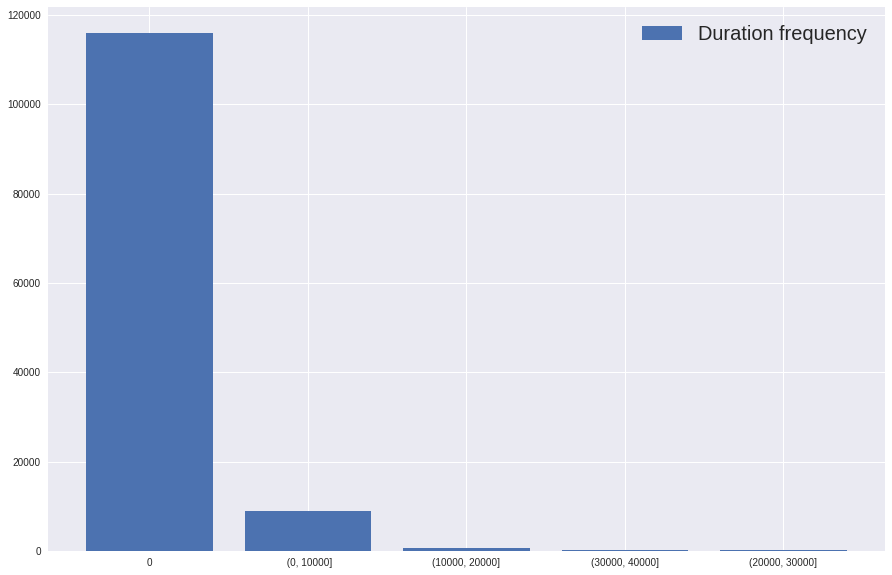

In [37]:
f, ax = plt.subplots(figsize=(15,10)) # set the size that you'd like (width, height)
plt.bar(duration_frequency.index, duration_frequency, label = 'Duration frequency')
ax.legend(fontsize = 20)

In [38]:
object_type_column = ['protocol_type', 'service', 'flag', 'label']

In [39]:
td_without_categorical = train_data.drop(object_type_column, axis=1)

In [ ]:
#train_viz.plot_data_distribution(td_without_categorical)

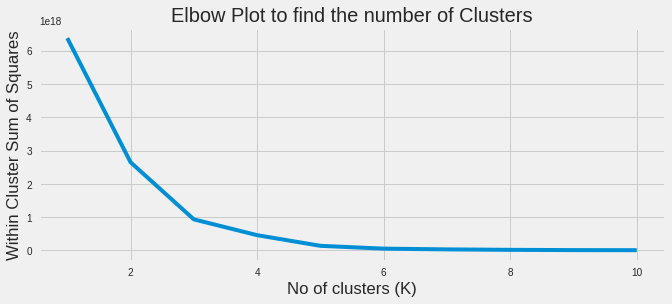

In [44]:
train_viz.plot_elbow_graph(td_without_categorical)